In [130]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [131]:
file = r"C:\Users\Simmi\Desktop\bayes.xlsx"
data = pd.read_excel(file)
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY CRIC
0,Rainy,Hot,High,True,No
1,Overcast,Hot,High,False,Yes
2,Sunny,Mild,High,False,Yes
3,Sunny,Cool,Normal,False,Yes
4,Sunny,Cool,Normal,True,No


In [132]:
data.describe()
data['PLAY CRIC']

0      No
1     Yes
2     Yes
3     Yes
4      No
5     Yes
6      No
7     Yes
8     Yes
9     Yes
10    Yes
11    Yes
12     No
Name: PLAY CRIC, dtype: object

In [133]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
data['OUTLOOK']=le.fit_transform(data['OUTLOOK'])

In [134]:
# Converting string labels into numbers
data['TEMPERATURE']=le.fit_transform(data['TEMPERATURE'])

In [135]:
data['HUMIDITY']=le.fit_transform(data['HUMIDITY'])

In [136]:
data['WINDY']=le.fit_transform(data['WINDY'])
data['PLAY CRIC']

0      No
1     Yes
2     Yes
3     Yes
4      No
5     Yes
6      No
7     Yes
8     Yes
9     Yes
10    Yes
11    Yes
12     No
Name: PLAY CRIC, dtype: object

In [137]:
data['PLAY CRIC']=le.fit_transform(data['PLAY CRIC'])


In [138]:
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY CRIC
0,1,1,0,1,0
1,0,1,0,0,1
2,2,2,0,0,1
3,2,0,1,0,1
4,2,0,1,1,0


In [139]:
x=data.drop('PLAY CRIC',axis=1)
y=data['PLAY CRIC']

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [141]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [147]:
x_test

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
2,2,2,0,0
3,2,0,1,0
4,2,0,1,1
10,0,2,0,1
1,0,1,0,0


In [142]:
pred= model.predict(x_test)
pred

array([0, 1, 1, 0, 0])

Text(91.68, 0.5, 'Predicted')

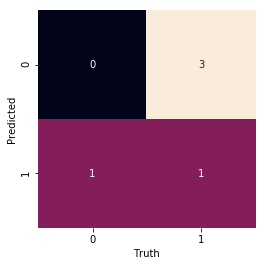

In [146]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')